In [1]:
import midynet
from midynet.utility import display
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pathlib
import numpy as np
import fractions


display.setup_dir("./")

paths_to_figures = [".", "../../../../papers/p-midynet/paper1-mutual_info/figures"]
paths_to_figures = list(map(pathlib.Path, paths_to_figures))

path_to_data = pathlib.Path(f"/home/charles_murphy/Documents/ulaval/doctorat/projects/data/midynet-data/duality/figure7/")
# path_to_data = pathlib.Path(f"/home/charles_murphy/Documents/ulaval/doctorat/projects/data/midynet-data/duality/figure2/")

path_to_data.exists()

True

## Loading data from experiment

In [2]:


exp = {}
bit_ratio = np.log(2)
hg, hx, mi = {}, {}, {}

all_dynamics = ["glauber", "sis", "cowan"]
for dynamics in all_dynamics:
    name = f"exact-{dynamics}"
    if (path_to_data / name / "config.pickle").exists():
        exp[dynamics] = midynet.Experiment.load_from_file(path_to_data / name / "config.pickle")
        data = exp[dynamics].metrics["recon_information"].data[exp[dynamics].name]
        hg[dynamics] = midynet.Statistics(data, name="prior")
        hx[dynamics] = midynet.Statistics(data, name="evidence")
        mi[dynamics] = midynet.Statistics(data, name="mutualinfo")

xlabel = r"Number of time steps"
titles = {"glauber": r"Glauber", "sis": r"SIS", "cowan": r"Cowan"}
coupling_labels = {"glauber": r"J", "sis": r"\lambda", "cowan": r"\nu"}
coupling_names = {"glauber": "coupling", "sis": r"infection_prob", "cowan": r"nu"}

AttributeError: Can't get attribute 'RandomGraphConfig' on <module 'midynet.config.random_graph' from '/home/charles_murphy/Documents/ulaval/doctorat/projects/codes/midynet/midynet/config/random_graph.py'>

## Figure 2 revisited

In [3]:
mi

{}

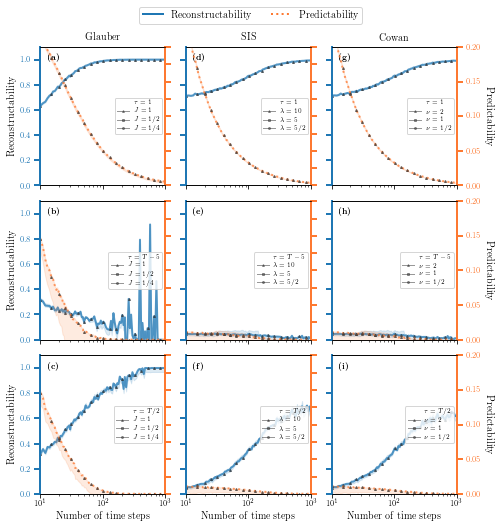

In [35]:
fig, ax = plt.subplots(3, 3, figsize=(7, 7), sharex=True, sharey=False)

ax = {dynamics: ax[:,i] for i, dynamics in enumerate(all_dynamics)}
axx = {dynamics: [_ax.twinx() for _ax in ax[dynamics]] for i, dynamics in enumerate(all_dynamics)}
# for dynamics in all_dynamics:
#     for i, _ax in enumerate(ax[dynamics]):
#         _ax.get_shared_y_axes().join(_ax, axx[dynamics][i])
    


recon_color = display.med_colors["blue"]
pred_color = display.dark_colors["orange"]


spacing = 7
min_index = 5
recon_yticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
pred_yticks = [0, 0.05, 0.1, 0.15, 0.2]

markers = ["o", "s", "^", "*"]
for dynamics_id, dynamics in enumerate(all_dynamics):
    if dynamics not in exp:
        continue
    x = np.array(exp[dynamics].config.data_model.length)
    m_indices = list(range(min_index)) + list(range(min_index, len(x), spacing))
    coupling = exp[dynamics].config.data_model.get_value(coupling_names[dynamics])
    tau = exp[dynamics].config.data_model.get_value("past_length")
    if dynamics == "sis":
        coupling = [c / exp[dynamics].config.data_model.recovery_prob for c in coupling]
    alpha = np.linspace(0, 1, len(coupling) + 2)[2:] ** 1.5
    recon = mi_past[dynamics] / hg_past[dynamics]
    pred = mi_past[dynamics] / (hx[dynamics] - hx_past[dynamics])
    tau = [0, -5, 0.5]
    tau_indices = [1, 0, 2]
    for i, (t_index, t) in enumerate(zip(tau_indices, tau)):
        for c_index, (c, a) in reversed(list(enumerate(zip(coupling, alpha)))):
            if c_index != 2:
                continue
            y = recon if len(coupling) == 1 else recon[:, c_index, t_index]
            display.plot_statistics(
                x, y,
                ax=ax[dynamics][i], 
                color=recon_color,
                alpha=0.75,
                linestyle="-",
                marker=markers[c_index],
                linewidth=2,
                markersize=2,
                markeredgecolor=display.dark_colors["grey"],
                bar=False,
                spacing=5,
            )
#             y = recon[m_indices] if len(coupling) == 1 else recon[m_indices, c_index, t_index]
#             display.plot_statistics(
#                 x[m_indices], y,
#                 ax=ax[dynamics][i], 
#                 color=recon_color,
#                 alpha=0.75,
#                 linestyle="None",
#                 marker=markers[c_index],
#                 markersize=2,
#                 markeredgecolor=display.dark_colors["grey"],
#                 bar=False,
#             )


            y = pred if len(coupling) == 1 else pred[:, c_index, t_index]
            display.plot_statistics(
                x, y,
                ax=axx[dynamics][i], 
                color=pred_color,
                alpha=0.75,
                linestyle="dotted",
                linewidth=2,
                marker=markers[c_index],
                markeredgecolor=display.dark_colors["grey"],
                markersize=2,
                bar=False,
                spacing=5,
            )
#             y = pred[m_indices] if len(coupling) == 1 else pred[m_indices, c_index, t_index]
#             display.plot_statistics(
#                 x[m_indices], y,
#                 ax=axx[dynamics][i], 
#                 color=pred_color,
#                 alpha=0.75,
#                 linestyle="None",
#                 marker=markers[c_index],
#                 markersize=2,
#                 markeredgecolor=display.dark_colors["grey"],
#                 bar=False,
#             )
        ax[dynamics][i].set_xscale("log")
        axx[dynamics][i].set_xscale("log")
#             axx[dynamics][i].set_ylim([0, axx[dynamics][i].get_ylim()[-1]])
    
        if dynamics_id == 0:
            ax[dynamics][i].set_ylabel(r"Reconstructability", fontsize=display.fontsizes["large"])
            ax[dynamics][i].set_yticks(recon_yticks)
        #         ax[dynamics].set_yticklabels([fractions.Fraction(x).limit_denominator() for x in recon_yticks])
        
        if dynamics_id == len(all_dynamics)-1:
            axx[dynamics][i].set_ylabel(r"Predictability", fontsize=display.fontsizes["large"], rotation=-90, rotation_mode="anchor", va="bottom")
            axx[dynamics][i].set_yticks(pred_yticks)
        #         axx[dynamics].set_yticklabels([fractions.Fraction(x).limit_denominator() for x in pred_yticks])
        if i == 2:
            ax[dynamics][i].set_xlabel(xlabel, fontsize=display.fontsizes["large"])
        ax[dynamics][i].tick_params(axis='both', labelsize=display.fontsizes["medium"])

        ax[dynamics][i].set_ylim([0, 1.1])
        ax[dynamics][i].set_xlim([min(x), max(x)])
        axx[dynamics][i].set_ylim([0, 0.2])
        if dynamics_id != 0:
            ax[dynamics][i].set_yticklabels([])
        if dynamics_id != 2:
            axx[dynamics][i].set_yticklabels([])
#     ax[dynamics].set_xlim([1, 1000])
#     ax[dynamics].set_ylim([0., 1.])
#     ax[dynamics].set_xscale("log")
    
#     axx[dynamics].set_xlabel(xlabel, fontsize=display.fontsizes["large"])
#     axx[dynamics].tick_params(axis='both', labelsize=display.fontsizes["medium"])
#     axx[dynamics].set_xlim([1, 1e4])
#     axx[dynamics].set_xscale("log")
#     axx[dynamics].set_ylim([0, 0.5])
    
        axx[dynamics][i].spines['left'].set_color(recon_color)
        axx[dynamics][i].spines['left'].set_linewidth(2)
        axx[dynamics][i].spines['right'].set_color(pred_color)
        axx[dynamics][i].spines['right'].set_linewidth(2)
        axx[dynamics][i].tick_params(axis='y', colors=pred_color, length=6, width=2)
        
        if t == 0:
            t_label = "1"
        elif t < 0:
            t_label = f"T - {abs(t)}"
        elif isinstance(t, float):
            t_fraction = fractions.Fraction(t)
            if t_fraction.numerator == 1:
                t_label = f"T / {t_fraction.denominator}"
            else:
                t_label = f"{t_fraction.numerator} T / {t_fraction.denominator}"
        handles = [
            Line2D(
                [0], [0], 
                marker="None", 
                linestyle="None", 
                color="k", 
                label=rf"$\tau = {t_label}$", 
                alpha=0.5,
                markersize=2,
                linewidth=1,
            )
        ]
        for k, c in reversed(list(enumerate(coupling))):
            handles.append(
                Line2D(
                    [0], [0], 
                    marker=markers[k], 
                    linestyle="-", 
                    color=display.dark_colors["grey"], 
                    label=rf"${coupling_labels[dynamics]} = {fractions.Fraction(c)}$", 
                    alpha=0.5,
                    markersize=2,
                    linewidth=1,
                )
            )
            
        
        # handles = [
        #     Line2D(
        #         [0], [0], 
        #         marker=markers[k], 
        #         linestyle="-", 
        #         color=display.dark_colors["grey"], 
        #         label=rf"${coupling_labels[dynamics]} = {fractions.Fraction(c)}$", 
        #         alpha=0.5,
        #         markersize=2,
        #         linewidth=1,
        #     )
        #     for k, c in reversed(list(enumerate(coupling)))
        # ]
        ax[dynamics][i].legend(handles=handles, loc="center right", fontsize=display.fontsizes["small"], ncol=1, frameon=True)
        ax[dynamics][i].tick_params(axis='y', colors=recon_color, length=6, width=2)
        
    ax[dynamics][0].set_title(titles[dynamics], fontsize=display.fontsizes["large"])
            
for dynamics in all_dynamics:
    for i in range(3):
        display.Label.plot(ax[dynamics][i], loc="top left", fontsize=display.fontsizes["medium"], box=True)
display.Label.clear()

handles = [Line2D([0], [0], marker="None", linestyle="-", color=recon_color, label=r"Reconstructability", alpha=1, lw=2, ms=2)]
handles += [Line2D([0], [0], marker="None", linestyle="dotted", color=pred_color, label=r"Predictability", alpha=1, lw=2, ms=2)]
lg = fig.legend(handles=handles, loc="center", fontsize=display.fontsizes["large"], ncol=2, bbox_to_anchor=(0.5, 1.02))

plt.tight_layout()
# plt.subplots_adjust(wspace=0.15)

# for p in paths_to_figures:
#     fig.savefig(p / "svg/p1-figure2.svg", bbox_extra_artists=(lg,), bbox_inches='tight')
#     fig.savefig(p / "pdf/p1-figure2.pdf", bbox_extra_artists=(lg,), bbox_inches='tight')
#     fig.savefig(p / "png/p1-figure2.png", bbox_extra_artists=(lg,), bbox_inches='tight')

/tmp/ipykernel_6946/2997571686.py:181: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


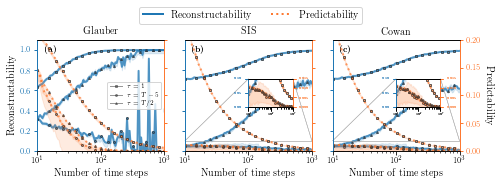

In [156]:
fig, ax = plt.subplots(1, 3, figsize=(7, 7 / 3), sharex=True, sharey=False)

ax = {dynamics: ax[i] for i, dynamics in enumerate(all_dynamics)}
axx = {dynamics: ax[dynamics].twinx() for i, dynamics in enumerate(all_dynamics)}
# for dynamics in all_dynamics:
#     for i, _ax in enumerate(ax[dynamics]):
#         _ax.get_shared_y_axes().join(_ax, axx[dynamics][i])
    


recon_color = display.med_colors["blue"]
pred_color = display.dark_colors["orange"]


spacing = 7
min_index = 5
recon_yticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
pred_yticks = [0, 0.05, 0.1, 0.15, 0.2]

c_indices = [2, 2, 2]

markers = ["o", "s", "^", "*"]
handles = []
for dynamics_id, dynamics in enumerate(all_dynamics):
    if dynamics not in exp:
        continue
    x = np.array(exp[dynamics].config.data_model.length)
    m_indices = list(range(min_index)) + list(range(min_index, len(x), spacing))
    coupling = exp[dynamics].config.data_model.get_value(coupling_names[dynamics])
    tau = exp[dynamics].config.data_model.get_value("past_length")
    if dynamics == "sis":
        coupling = [c / exp[dynamics].config.data_model.recovery_prob for c in coupling]
    alpha = np.linspace(0, 1, len(coupling) + 2)[2:] ** 1.5
    recon = mi_past[dynamics] / hg_past[dynamics]
    pred = mi_past[dynamics] / (hx[dynamics] - hx_past[dynamics])
    tau = [0, -5, 0.5]
    tau_indices = [1, 0, 2]
    for i, (t_index, t) in enumerate(zip(tau_indices, tau)):
        y = recon if len(coupling) == 1 else recon[:, c_indices[dynamics_id], t_index]
        display.plot_statistics(
            x, y,
            ax=ax[dynamics], 
            color=recon_color,
            alpha=0.75,
            linestyle="-",
            marker=markers[t_index],
            linewidth=2,
            markersize=2,
            markeredgecolor=display.dark_colors["grey"],
            bar=False,
            spacing=5,
        )

        y = pred if len(coupling) == 1 else pred[:, c_indices[dynamics_id], t_index]
        display.plot_statistics(
            x, y,
            ax=axx[dynamics], 
            color=pred_color,
            alpha=0.75,
            linestyle="dotted",
            linewidth=2,
            marker=markers[t_index],
            markeredgecolor=display.dark_colors["grey"],
            markersize=2,
            bar=False,
            spacing=5,
        )
        if t == 0:
            t_label = "1"
        elif t < 0:
            t_label = f"T - {abs(t)}"
        elif isinstance(t, float):
            t_fraction = fractions.Fraction(t)
            if t_fraction.numerator == 1:
                t_label = f"T / {t_fraction.denominator}"
            else:
                t_label = f"{t_fraction.numerator} T / {t_fraction.denominator}"
        if dynamics_id == 0:
            handles.append(
                Line2D(
                    [0], [0], 
                    marker=markers[t_index], 
                    linestyle="-", 
                    color=display.dark_colors["grey"], 
                    label=rf"$\tau = {t_label}$", 
                    alpha=0.5,
                    markersize=2,
                    linewidth=1,
                )
            )
        if dynamics != "glauber":
            axins = ax[dynamics].inset_axes([0.5, 0.4, 0.35, 0.25])
            axxins = axins.twinx()
            y = recon[:, c_indices[dynamics_id], t_index]
            display.plot_statistics(
                x, y,
                ax=axins, 
                color=recon_color,
                alpha=0.75,
                linestyle="-",
                marker=markers[t_index],
                linewidth=2,
                markersize=2,
                markeredgecolor=display.dark_colors["grey"],
                bar=False,
                spacing=5,
            )

            y = pred if len(coupling) == 1 else pred[:, c_indices[dynamics_id], t_index]
            display.plot_statistics(
                x, y,
                ax=axxins, 
                color=pred_color,
                alpha=0.75,
                linestyle="dotted",
                linewidth=2,
                marker=markers[t_index],
                markeredgecolor=display.dark_colors["grey"],
                markersize=2,
                bar=False,
                spacing=5,
            )
            axins.set_ylim([0, 0.1])
            axins.set_xlim([10, 1000])
            axins.set_xscale("log")
            axins.set_yticks([0, 0.05, 0.1])
            axxins.set_ylim([0, 0.015])
            axxins.set_yticks([0, 0.005, 0.01, 0.015])
            
            axins.tick_params(axis='y', colors=recon_color, length=3, width=1, labelsize=3)
            axxins.tick_params(axis='y', colors=pred_color, length=3, width=1, labelsize=3)
            axins.tick_params(axis='x', labelsize=3)
    
            axxins.spines['left'].set_color(recon_color)
            axxins.spines['left'].set_linewidth(1)
            axxins.spines['right'].set_color(pred_color)
            axxins.spines['right'].set_linewidth(1)
            rec, lines = ax[dynamics].indicate_inset_zoom(axins, edgecolor=display.light_colors["grey"])
            rec.set_linewidth(0.5)
            for l in lines:
                l.set_linewidth(0.5)
            
    ax[dynamics].set_xscale("log")
    axx[dynamics].set_xscale("log")

    if dynamics_id == 0:
        ax[dynamics].set_ylabel(r"Reconstructability", fontsize=display.fontsizes["large"])
        ax[dynamics].set_yticks(recon_yticks)
        ax[dynamics].legend(handles=handles, loc="center right", fontsize=display.fontsizes["small"], ncol=1, frameon=True)        

    if dynamics_id == len(all_dynamics)-1:
        axx[dynamics].set_ylabel(r"Predictability", fontsize=display.fontsizes["large"], rotation=-90, rotation_mode="anchor", va="bottom")
        axx[dynamics].set_yticks(pred_yticks)
    if i == 2:
        ax[dynamics].set_xlabel(xlabel, fontsize=display.fontsizes["large"])
    ax[dynamics].tick_params(axis='both', labelsize=display.fontsizes["medium"])

    ax[dynamics].set_ylim([0, 1.1])
    ax[dynamics].set_xlim([min(x), max(x)])
    axx[dynamics].set_ylim([0, 0.2])
    if dynamics_id != 0:
        ax[dynamics].set_yticklabels([])
    if dynamics_id != 2:
        axx[dynamics].set_yticklabels([])
    
    axx[dynamics].spines['left'].set_color(recon_color)
    axx[dynamics].spines['left'].set_linewidth(1)
    axx[dynamics].spines['right'].set_color(pred_color)
    axx[dynamics].spines['right'].set_linewidth(1)
    axx[dynamics].tick_params(axis='y', colors=pred_color, length=3, width=1)
    ax[dynamics].tick_params(axis='y', colors=recon_color, length=3, width=1)
    ax[dynamics].set_title(titles[dynamics], fontsize=display.fontsizes["large"])
for dynamics in all_dynamics:
    display.Label.plot(ax[dynamics], loc="top left", fontsize=display.fontsizes["medium"], box=True)
display.Label.clear()

handles = [Line2D([0], [0], marker="None", linestyle="-", color=recon_color, label=r"Reconstructability", alpha=1, lw=2, ms=2)]
handles += [Line2D([0], [0], marker="None", linestyle="dotted", color=pred_color, label=r"Predictability", alpha=1, lw=2, ms=2)]
lg = fig.legend(handles=handles, loc="center", fontsize=display.fontsizes["large"], ncol=2, bbox_to_anchor=(0.5, 1.02))

plt.tight_layout()
# plt.subplots_adjust(wspace=0.15)

for p in paths_to_figures:
    fig.savefig(p / "svg/p1-figure2.svg", bbox_extra_artists=(lg,), bbox_inches='tight')
    fig.savefig(p / "pdf/p1-figure2.pdf", bbox_extra_artists=(lg,), bbox_inches='tight')
    fig.savefig(p / "png/p1-figure2.png", bbox_extra_artists=(lg,), bbox_inches='tight')

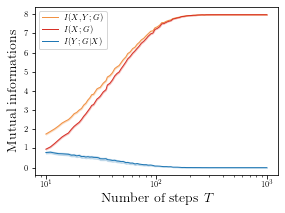

In [157]:
# plt.plot(exp["glauber"][:, 1, 0]
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
dynamics = "glauber"
c_index = 0
t_index = 0
ax = [ax]

T = exp[dynamics].config.data_model.length
# display.plot_statistics(T, mi_past[dynamics][:, c_index, 1], ax=ax[0], label=r"$\tau=1$", color=display.med_colors["red"], marker="o")
# display.plot_statistics(T, mi_past[dynamics][:, c_index, 0], ax=ax[0], label=r"$\tau=T - 5$", color=display.med_colors["orange"], marker="s")
display.plot_statistics(T, mi[dynamics][:, c_index, t_index], ax=ax[0], label=r"$I(X,Y;G)$", color=display.med_colors["orange"], marker="None", fill=True, bar=False)
display.plot_statistics(T, mi_pastonly[dynamics][:, c_index, t_index], ax=ax[0], label=r"$I(X;G)$", color=display.med_colors["red"], marker="None", fill=True, bar=False)
display.plot_statistics(T, mi_past[dynamics][:, c_index, t_index], ax=ax[0], label=r"$I(Y;G|X)$", color=display.med_colors["blue"], marker="None", fill=True, bar=False)
ax[0].legend()
ax[0].set_xlabel(r"Number of steps $T$", fontsize=14)
ax[0].set_ylabel(r"Mutual informations", fontsize=14)
ax[0].set_xscale("log")

# # display.plot_statistics(T, hg_past[dynamics][:, c_index, 1], ax=ax[1], label=r"$\tau=1$", color=display.med_colors["red"], marker="o")
# # display.plot_statistics(T, hg_past[dynamics][:, c_index, 0], ax=ax[1], label=r"$\tau=T - 5$", color=display.med_colors["orange"], marker="s")
# display.plot_statistics(T, hg_past[dynamics][:, c_index, 2], ax=ax[1], label=r"$\tau=T / 2$", color=display.med_colors["blue"], marker="v")
# ax[1].set_xlabel(r"Number of steps $T$", fontsize=14)
# ax[1].set_ylabel(r"Posterior entropy $H(G|X)$", fontsize=14)
# ax[1].set_xscale("log")

# evidence_entropy = hx[dynamics] - hx_past[dynamics]
# # display.plot_statistics(T, evidence_entropy[:, c_index, 1], ax=ax[2], label=r"$\tau=1$", color=display.med_colors["red"], marker="o")
# # display.plot_statistics(T, evidence_entropy[:, c_index, 0], ax=ax[2], label=r"$\tau=T - 5$", color=display.med_colors["orange"], marker="s")
# display.plot_statistics(T, evidence_entropy[:, c_index, 2], ax=ax[2], label=r"$\tau=T / 2$", color=display.med_colors["blue"], marker="v")
# ax[2].set_xlabel(r"Number of steps $T$", fontsize=14)
# ax[2].set_ylabel(r"Evidence entropy $H(Y|X)$", fontsize=14)
# ax[2].set_xscale("log")

fig.tight_layout()

# ax[0].plot(T, hg_past["glauber"][:, 1, 0]["mid"])
# ax[0].plot(T, hg_past["glauber"][:, 1, 1]["mid"])
# ax[0].plot(T, hg_past["glauber"][:, 1, 2]["mid"])
# ax[0].legend()
# ax[0].xlabel(r"Number of steps $T$", fontsize=14)
# ax[0].ylabel(r"Mutual information", fontsize=14)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


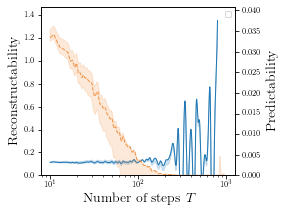

In [158]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
T = exp[dynamics].config.data_model.length
recon = mi_past[dynamics] / hg_past[dynamics]
axx = ax.twinx()
# display.plot_statistics(T, recon[:, c_index, 1], ax=ax[0], label=r"$\tau=1$", color=display.med_colors["red"], marker="o")
# display.plot_statistics(T, recon[:, c_index, 0], ax=ax[0], label=r"$\tau=T - 5$", color=display.med_colors["orange"], marker="s")

display.plot_statistics(T[:-5], recon[:-5, c_index, t_index], ax=ax, color=display.med_colors["blue"], marker="None", interpolate="cubic", linestyle="-", fill=True, bar=False)

pred = mi_past[dynamics] / (hx[dynamics] - hx_past[dynamics])
# display.plot_statistics(T, pred[:, c_index, 1], ax=ax[1], label=r"$\tau=1$", color=display.med_colors["red"], marker="o")
# display.plot_statistics(T, pred[:, c_index, 0], ax=ax[1], label=r"$\tau=T - 5$", color=display.med_colors["orange"], marker="s")
display.plot_statistics(T, pred[:, c_index, t_index], ax=axx, color=display.med_colors["orange"], marker="None", interpolate="cubic", linestyle="--", fill=True, bar=False)
ax.set_xlabel(r"Number of steps $T$", fontsize=14)
ax.set_ylabel(r"Reconstructability", fontsize=14)
axx.set_ylabel(r"Predictability", fontsize=14)
ax.set_ylim([0, ax.get_ylim()[-1]])
axx.set_ylim([0, axx.get_ylim()[-1]])
ax.set_xscale("log")
ax.legend()

fig.tight_layout()


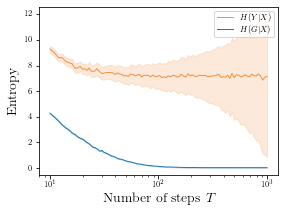

In [123]:
# plt.plot(exp["glauber"][:, 1, 0]
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
dynamics = "glauber"
c_index = 2
t_index = 0

T = exp[dynamics].config.data_model.length
# display.plot_statistics(T, mi_past[dynamics][:, c_index, 1], ax=ax[0], label=r"$\tau=1$", color=display.med_colors["red"], marker="o")
# display.plot_statistics(T, mi_past[dynamics][:, c_index, 0], ax=ax[0], label=r"$\tau=T - 5$", color=display.med_colors["orange"], marker="s")
hx_pastonly = hx[dynamics] - hx_past[dynamics]
display.plot_statistics(T, hx_pastonly[:, c_index, t_index], ax=ax, color=display.med_colors["orange"], label=r"$H(Y|X)$", marker="None", fill=True, bar=False)
display.plot_statistics(T, hg_past[dynamics][:, c_index, t_index], ax=ax, color=display.med_colors["blue"], marker="None", label=r"$H(G|X)$", fill=True, bar=False)
ax.legend()
ax.set_xlabel(r"Number of steps $T$", fontsize=14)
ax.set_ylabel(r"Entropy", fontsize=14)
ax.set_xscale("log")

# # display.plot_statistics(T, hg_past[dynamics][:, c_index, 1], ax=ax[1], label=r"$\tau=1$", color=display.med_colors["red"], marker="o")
# # display.plot_statistics(T, hg_past[dynamics][:, c_index, 0], ax=ax[1], label=r"$\tau=T - 5$", color=display.med_colors["orange"], marker="s")
# display.plot_statistics(T, hg_past[dynamics][:, c_index, 2], ax=ax[1], label=r"$\tau=T / 2$", color=display.med_colors["blue"], marker="v")
# ax[1].set_xlabel(r"Number of steps $T$", fontsize=14)
# ax[1].set_ylabel(r"Posterior entropy $H(G|X)$", fontsize=14)
# ax[1].set_xscale("log")

# evidence_entropy = hx[dynamics] - hx_past[dynamics]
# # display.plot_statistics(T, evidence_entropy[:, c_index, 1], ax=ax[2], label=r"$\tau=1$", color=display.med_colors["red"], marker="o")
# # display.plot_statistics(T, evidence_entropy[:, c_index, 0], ax=ax[2], label=r"$\tau=T - 5$", color=display.med_colors["orange"], marker="s")
# display.plot_statistics(T, evidence_entropy[:, c_index, 2], ax=ax[2], label=r"$\tau=T / 2$", color=display.med_colors["blue"], marker="v")
# ax[2].set_xlabel(r"Number of steps $T$", fontsize=14)
# ax[2].set_ylabel(r"Evidence entropy $H(Y|X)$", fontsize=14)
# ax[2].set_xscale("log")

fig.tight_layout()

# ax[0].plot(T, hg_past["glauber"][:, 1, 0]["mid"])
# ax[0].plot(T, hg_past["glauber"][:, 1, 1]["mid"])
# ax[0].plot(T, hg_past["glauber"][:, 1, 2]["mid"])
# ax[0].legend()
# ax[0].xlabel(r"Number of steps $T$", fontsize=14)
# ax[0].ylabel(r"Mutual information", fontsize=14)

